In [ ]:
#huggingface_hub가 제공하는 데이터 셋 확인해보기
from huggingface_hub import list_datasets

all_datasets=[ds.id for ds in list_datasets()]
print(f"현재 허브에는 {len(all_datasets)}개의 데이터 셋이 있습니다.")
print(f"처음 10개의 데이터 셋 : {all_datasets[:10]}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


현재 허브에는 153152개의 데이터 셋이 있습니다.
처음 10개의 데이터 셋 : ['amirveyseh/acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'allegro_reviews']


In [ ]:
!pip install datasets
from datasets import load_dataset

# "emotion" 데이터셋 로드
emotions = load_dataset("emotion")

# 데이터셋 정보 출력
print(emotions)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
train_ds=emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
import pandas as pd

emotions.set_format(type="pandas")
df=emotions["train"][:]
df.head(n=10)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


In [ ]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"]=df["label"].apply(label_int2str)
df.head(n=10)

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sadness
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear
8,i have been with petronas for years i feel tha...,1,joy
9,i feel romantic too,2,love


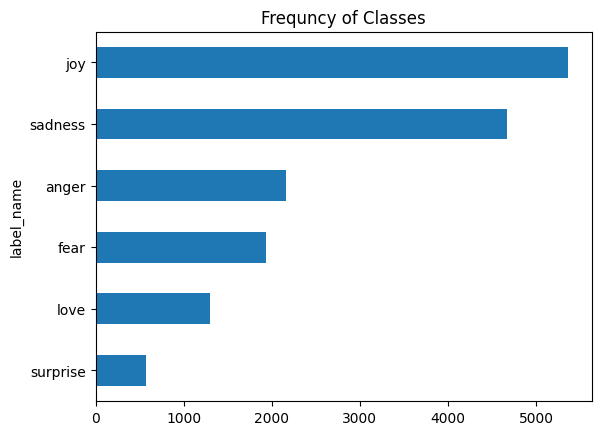

In [ ]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequncy of Classes")
plt.show()

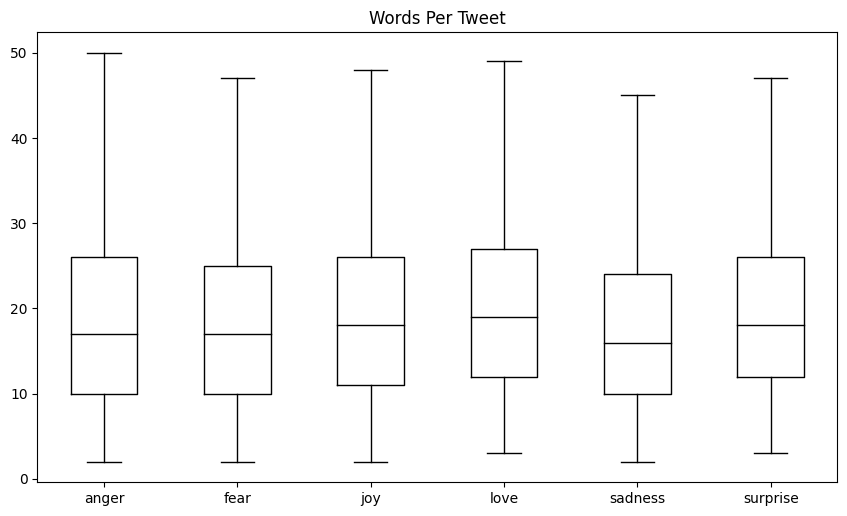

In [ ]:
df["Words Per Tweet"]=df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, figsize=(10,6),color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
emotions.reset_format()

In [ ]:

from transformers import AutoTokenizer

model_checkpoint="distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
# 입력 텍스트
text = "This is kuggle 10th project!!"

# 텍스트를 토큰화
encoded_text = tokenizer(text)

# 토큰 ID를 토큰 문자열로 변환
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

# 토큰 문자열 출력
print(tokens)


['[CLS]', 'this', 'is', 'ku', '##ggle', '10th', 'project', '!', '!', '[SEP]']


In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

emotions_encoded=emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModel
import torch

model_ckpt="distilbert-base-uncased"
device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model=AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
text="This is kuggle project!!"
inputs=tokenizer(text, return_tensors="pt")
print(f"입력 텐서 크기 : {inputs['input_ids'].size()}")

입력 텐서 크기 : torch.Size([1, 9])


In [ ]:
inputs={k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.0021, -0.1692,  0.0922,  ..., -0.0795,  0.2836,  0.3428],
         [-0.4409, -0.5494,  0.0389,  ..., -0.3304,  0.5518,  0.1080],
         [-0.3667, -0.3496,  0.3500,  ..., -0.0136,  0.3455,  0.6502],
         ...,
         [ 0.1823, -0.1244,  0.3321,  ...,  0.1958,  0.0129,  0.0325],
         [ 0.0321, -0.3731,  0.1155,  ...,  0.1503,  0.0350, -0.0610],
         [ 0.8136,  0.0508, -0.3682,  ...,  0.1732, -0.5559, -0.2883]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 9, 768])

In [ ]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [ ]:
def extract_hidden_states(batch):
  inputs={k:v.to(device) for k,v in batch.items()
      if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state=model(**inputs).last_hidden_state
  return {"hidden_state":last_hidden_state[:,0].cpu().numpy()}


In [ ]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_hidden=emotions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import numpy as np

X_train=np.array(emotions_hidden["train"]["hidden_state"])
X_valid=np.array(emotions_hidden["validation"]["hidden_state"])
y_train=np.array(emotions_hidden["train"]["label"])
y_valid=np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [ ]:
!pip install umap-learn
import pandas as pd
import umap
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# 예제 데이터 로드
# X_train과 y_train을 예제로 사용합니다.

# 데이터 스케일링
X_scaled = MinMaxScaler().fit_transform(X_train)

# UMAP 적용
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# 결과를 데이터프레임으로 변환
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train

# 결과 출력
print(df_emb.head())


          X         Y  label
0  4.096453  6.360024      0
1 -3.229114  5.525145      0
2  5.332600  2.953250      3
3 -2.508827  3.498776      2
4 -3.629252  3.645584      3


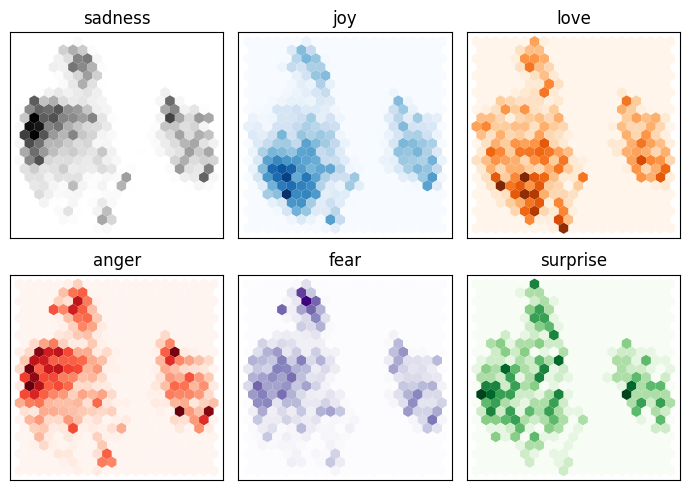

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(7,5))
axes=axes.flatten()
cmaps=["Greys","Blues","Oranges","Reds","Purples","Greens"]
labels=emotions["train"].features["label"].names

for i, (label,cmap) in enumerate(zip(labels,cmaps)):
  df_emb_sub=df_emb.query(f"label=={i}")
  axes[i].hexbin(df_emb_sub["X"],df_emb_sub["Y"],cmap=cmap,gridsize=20,linewidth=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([])
  axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_valid,y_valid)

0.634

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_valid,y_valid)

0.352

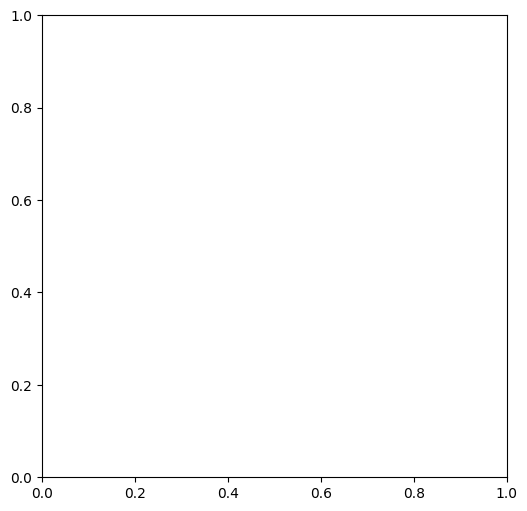

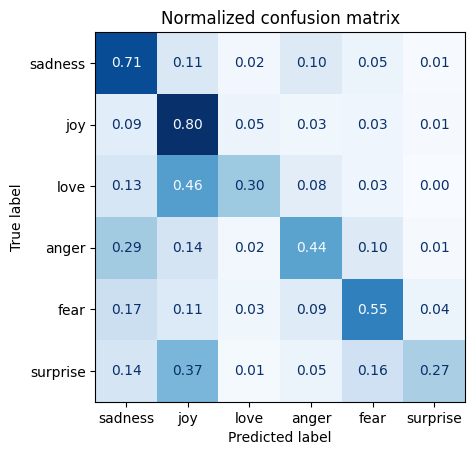

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

def plot_confusion_matrix(y_preds,y_true,labels):
  cm=confusion_matrix(y_true,y_preds,normalize="true")
  fig,ax=plt.subplots(figsize=(6,6))
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  disp.plot(cmap="Blues",values_format=".2f",colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds=lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds,y_valid,labels)

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels=6
model=AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 본인의 Hugging Face에 모델 제작하여 업로드 하기

## 핵심 코드만 다시 정리한 부분


In [15]:
from huggingface_hub import notebook_login

notebook_login()

In [14]:
import json
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    pipeline,
    AutoConfig,
    Trainer,
    TrainingArguments,
)
from datasets import load_dataset

# 설정
model_checkpoint = "distilbert-base-uncased"
num_labels = 6
label_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# 데이터셋 로드 및 토큰화 함수
def load_and_tokenize_dataset(model_checkpoint):
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
    emotions = load_dataset("emotion")
    max_length = 128
    emotions_encoded = emotions.map(lambda batch: tokenizer(batch["text"], padding='max_length', truncation=True, max_length=max_length), batched=True)
    emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
    return emotions_encoded, tokenizer

emotions_encoded, tokenizer = load_and_tokenize_dataset(model_checkpoint)
train_dataset = emotions_encoded["train"]
eval_dataset = emotions_encoded["validation"]

# 모델 로드 및 설정
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

# TrainingArguments 설정
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
)

# Trainer 설정 및 훈련
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)
trainer.train()

# 모델 저장
trainer.save_model("./my_model")
tokenizer.save_pretrained("./my_model")


/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transfo

Epoch,Training Loss,Validation Loss
1,0.262400,0.205964


('./my_model/tokenizer_config.json',
 './my_model/special_tokens_map.json',
 './my_model/vocab.txt',
 './my_model/added_tokens.json',
 './my_model/tokenizer.json')

## 토큰을 입력하세요 (Writing 권한)

In [ ]:
from huggingface_hub import HfApi

# 설정
hf_token = "your_huggingface_token_here"  # 여기서 Hugging Face 토큰을 설정
model_id = "forwarder1121/test"  # 본인의 계정으로 수정

# Hugging Face 리포지토리 생성
api = HfApi()
api.create_repo(repo_id=model_id, token=hf_token)
print(f"Repository {model_id} created.")


In [20]:
import json
from transformers import AutoConfig

# 모델 구성 파일 업로드 및 설정
def update_model_config(model_id, label_names, token):
    config = AutoConfig.from_pretrained("./my_model")
    id2label = {str(i): label for i, label in enumerate(label_names)}
    label2id = {label: str(i) for i, label in enumerate(label_names)}
    config.id2label = id2label
    config.label2id = label2id
    config_path = "config.json"
    with open(config_path, "w") as f:
        json.dump(config.to_dict(), f)
    api.upload_file(
        path_or_fileobj=config_path,
        path_in_repo="config.json",
        repo_id=model_id,
        repo_type="model",
        token=token,
    )
    print(f"Updated config.json uploaded to {model_id}.")
    return config

# 인증 토큰 설정
config = update_model_config(model_id, label_names, hf_token)


In [21]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 모델 및 토크나이저 로드 및 업로드
model = AutoModelForSequenceClassification.from_pretrained("./my_model", config=config)
tokenizer = AutoTokenizer.from_pretrained("./my_model")

model.push_to_hub(model_id, use_auth_token=hf_token)
tokenizer.push_to_hub(model_id, use_auth_token=hf_token)
print(f"Model and tokenizer pushed to {model_id}.")


/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:836: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]